Data Scarping

In [ ]:
pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.3/448.3 kB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.6 MB/s eta 0:00:00


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time

def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

url = 'https://www.imdb.com/title/tt1517268/reviews/?ref_=tt_ov_rt'

def load_all_reviews(driver):
    while True:
        try:
            load_more_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.CLASS_NAME, 'ipl-load-more__button'))
            )
            load_more_button.click()
            time.sleep(2)
        except Exception as e:
            print(f"No more 'Load More' button found or unable to click: {str(e)}")
            break

def extract_reviews(driver):
    reviews = driver.find_elements(By.CLASS_NAME, 'text.show-more__control')
    ratings = driver.find_elements(By.CLASS_NAME, 'rating-other-user-rating')

    reviews_texts = [review.text for review in reviews]
    ratings_texts = [rating.text if rating.text else 'No rating' for rating in ratings]

    # Ensure the lengths of reviews and ratings match by filling missing ratings with 'No rating'
    if len(reviews_texts) != len(ratings_texts):
        diff = abs(len(reviews_texts) - len(ratings_texts))
        if len(reviews_texts) > len(ratings_texts):
            for _ in range(diff):
                ratings_texts.append('No rating')
        else:
            for _ in range(diff):
                reviews_texts.append('No review')

    data = {'Review': reviews_texts, 'Rating': ratings_texts}
    df = pd.DataFrame(data)
    print(df)


driver = web_driver()
driver.get(url)

# Scroll to the bottom to load reviews
driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)
time.sleep(3)

# Click 'Load More' until no more reviews are loaded
load_all_reviews(driver)

# Extract all reviews and ratings
extract_reviews(driver)

driver.quit()

No more 'Load More' button found or unable to click: Message: 

                                                 Review     Rating
0     Margot does the best with what she's given, bu...       6/10
1                                                             6/10
2                                                             7/10
3     To say that I was disappointed is an understat...      10/10
4     As much as it pains me to give a movie called ...       6/10
...                                                 ...        ...
1464  This is my first review at imdb and tbh I real...  No rating
1465  I'm NOT a Barbie girl in NOT the Barbie World,...  No rating
1466  The movie is mediocre at best. I expected an o...  No rating
1467  Some things were super clever and made me laug...  No rating
1468  For sure It failed to achieve feminism or be a...  No rating

[1469 rows x 2 columns]


In [ ]:
pip install textblob

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

url = 'https://www.imdb.com/title/tt1517268/reviews/?ref_=tt_ov_rt'

def load_all_reviews(driver):
    while True:
        try:
            load_more_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.CLASS_NAME, 'ipl-load-more__button'))
            )
            load_more_button.click()
            time.sleep(2)
        except Exception as e:
            print(f"No more 'Load More' button found or unable to click: {str(e)}")
            break

def extract_reviews(driver):
    reviews = driver.find_elements(By.CLASS_NAME, 'text.show-more__control')
    ratings = driver.find_elements(By.CLASS_NAME, 'rating-other-user-rating')

    reviews_texts = [review.text for review in reviews]
    ratings_texts = [rating.text if rating.text else 'No rating' for rating in ratings]

    # Ensure the lengths of reviews and ratings match by filling missing ratings with 'No rating'
    if len(reviews_texts) != len(ratings_texts):
        diff = abs(len(reviews_texts) - len(ratings_texts))
        if len(reviews_texts) > len(ratings_texts):
            for _ in range(diff):
                ratings_texts.append('No rating')
        else:
            for _ in range(diff):
                reviews_texts.append('No review')

    data = {'Review': reviews_texts, 'Rating': ratings_texts}
    df = pd.DataFrame(data)
    print(df)


driver = web_driver()
driver.get(url)

# Scroll to the bottom to load reviews
driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)
time.sleep(3)

# Click 'Load More' until no more reviews are loaded
load_all_reviews(driver)

# Extract all reviews and ratings
#extract_reviews(driver)

# Extract the reviews
reviews = driver.find_elements(By.CLASS_NAME, 'text.show-more__control')

# Process the reviews and perform sentiment analysis
review_text = [review.text for review in reviews]

# Initialize SentimentIntensityAnalyzer from NLTK
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_score(text):
    sentiment_score = sia.polarity_scores(text)['compound']
    return sentiment_score

# Calculate sentiment scores for each review
sentiment_scores = [get_sentiment_score(text) for text in review_text]

# Combine reviews and their sentiment scores into a DataFrame
data = {'Review': review_text, 'Sentiment_Score': sentiment_scores}
sentiment_df = pd.DataFrame(data)

print(sentiment_df)

No more 'Load More' button found or unable to click: Message: 

                                                 Review  Sentiment_Score
0     Margot does the best with what she's given, bu...           0.9235
1                                                                 0.0000
2                                                                 0.0000
3     To say that I was disappointed is an understat...          -0.7082
4     As much as it pains me to give a movie called ...           0.9898
...                                                 ...              ...
1464  This is my first review at imdb and tbh I real...          -0.8902
1465  I'm NOT a Barbie girl in NOT the Barbie World,...           0.4098
1466  The movie is mediocre at best. I expected an o...           0.9161
1467  Some things were super clever and made me laug...           0.8873
1468  For sure It failed to achieve feminism or be a...           0.9709

[1469 rows x 2 columns]


In [ ]:
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

sentiment_df['Sentiment_Category'] = sentiment_df['Sentiment_Score'].apply(categorize_sentiment)

print(sentiment_df)

                                                 Review  Sentiment_Score  \
0     Margot does the best with what she's given, bu...           0.9235   
1                                                                 0.0000   
2                                                                 0.0000   
3     To say that I was disappointed is an understat...          -0.7082   
4     As much as it pains me to give a movie called ...           0.9898   
...                                                 ...              ...   
1464  This is my first review at imdb and tbh I real...          -0.8902   
1465  I'm NOT a Barbie girl in NOT the Barbie World,...           0.4098   
1466  The movie is mediocre at best. I expected an o...           0.9161   
1467  Some things were super clever and made me laug...           0.8873   
1468  For sure It failed to achieve feminism or be a...           0.9709   

     Sentiment_Category  
0              Positive  
1               Neutral  
2        

In [ ]:
sentiment_df.to_csv('movie_reviews.csv', index=False)

In [ ]:
sentiment_df

,Review,Sentiment_Score,Sentiment_Category
0,"Margot does the best with what she's given, bu...",0.9235,Positive
1,,0.0000,Neutral
2,,0.0000,Neutral
3,To say that I was disappointed is an understat...,-0.7082,Negative
4,As much as it pains me to give a movie called ...,0.9898,Positive
...,...,...,...
1464,This is my first review at imdb and tbh I real...,-0.8902,Negative
1465,"I'm NOT a Barbie girl in NOT the Barbie World,...",0.4098,Positive
1466,The movie is mediocre at best. I expected an o...,0.9161,Positive
1467,Some things were super clever and made me laug...,0.8873,Positive


##DATA WRANGLING

**Handling Missing Values**

Missing Values per Column:
Review                362
Sentiment_Score         0
Sentiment_Category      0
dtype: int64

Percentage of Missing Values per Column:
Review                24.642614
Sentiment_Score        0.000000
Sentiment_Category     0.000000
dtype: float64

Rows with Missing Values:
     Review  Sentiment_Score Sentiment_Category
1       NaN              0.0            Neutral
2       NaN              0.0            Neutral
5       NaN              0.0            Neutral
7       NaN              0.0            Neutral
8       NaN              0.0            Neutral
...     ...              ...                ...
1451    NaN              0.0            Neutral
1452    NaN              0.0            Neutral
1456    NaN              0.0            Neutral
1458    NaN              0.0            Neutral
1460    NaN              0.0            Neutral

[362 rows x 3 columns]


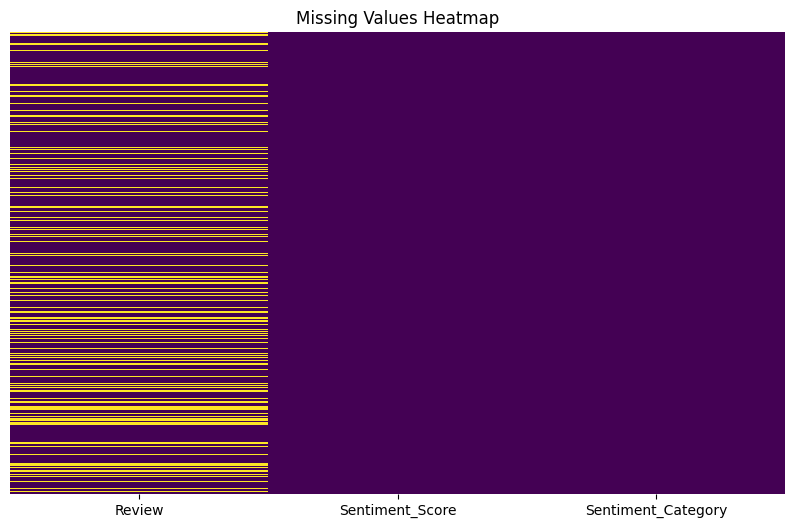

In [ ]:
import pandas as pd

df = pd.read_csv('/content/movie_reviews.csv')

missing_values = df.isnull().sum()

print("Missing Values per Column:")
print(missing_values)

missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of Missing Values per Column:")
print(missing_percentage)

rows_with_missing = df[df.isnull().any(axis=1)]
print("\nRows with Missing Values:")
print(rows_with_missing)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

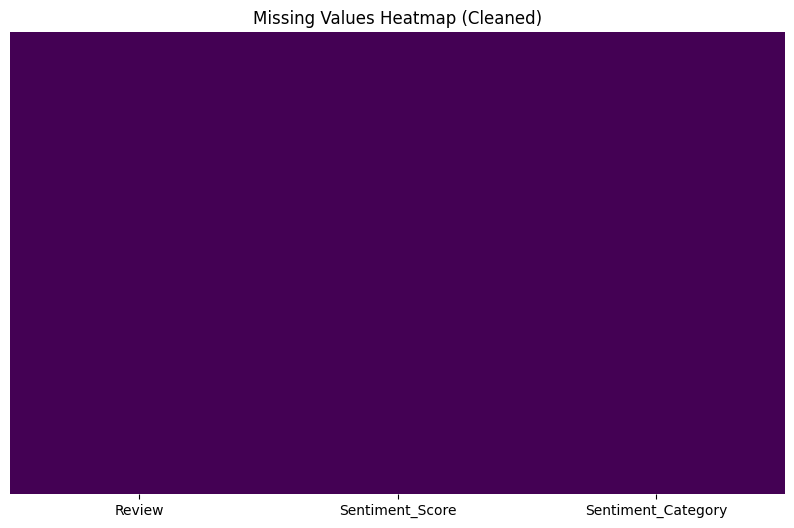

In [ ]:
# Remove rows with missing values
df_cleaned = df.dropna()

plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap (Cleaned)')
plt.show()

In [ ]:
df_cleaned.to_csv('movie_reviews.csv', index=False)

In [ ]:
df_cleaned

,Review,Sentiment_Score,Sentiment_Category
0,"Margot does the best with what she's given, bu...",0.9235,Positive
3,To say that I was disappointed is an understat...,-0.7082,Negative
4,As much as it pains me to give a movie called ...,0.9898,Positive
6,"It pains me to say it, but I enjoyed this movi...",0.9986,Positive
9,"The quality, the humor, and the writing of the...",0.9678,Positive
...,...,...,...
1464,This is my first review at imdb and tbh I real...,-0.8902,Negative
1465,"I'm NOT a Barbie girl in NOT the Barbie World,...",0.4098,Positive
1466,The movie is mediocre at best. I expected an o...,0.9161,Positive
1467,Some things were super clever and made me laug...,0.8873,Positive


**Data Preprocessing**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Define stop words
stop_words = set(stopwords.words('english'))

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove duplicates
    unique_tokens = list(set(tokens))

    # Join tokens back into text
    processed_text = ' '.join(unique_tokens)

    return processed_text

# Apply preprocessing to each review in the DataFrame
sentiment_df['Processed_Review'] = sentiment_df['Review'].apply(preprocess_text)

# Display the DataFrame with processed reviews
print(sentiment_df[['Review', 'Processed_Review']])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                 Review  \
0     Margot does the best with what she's given, bu...   
1                                                         
2                                                         
3     To say that I was disappointed is an understat...   
4     As much as it pains me to give a movie called ...   
...                                                 ...   
1464  This is my first review at imdb and tbh I real...   
1465  I'm NOT a Barbie girl in NOT the Barbie World,...   
1466  The movie is mediocre at best. I expected an o...   
1467  Some things were super clever and made me laug...   
1468  For sure It failed to achieve feminism or be a...   

                                       Processed_Review  
0     disappointing 20 old fall '' . way make man tr...  
1                                                        
2                                                        
3     . job tried became point joke topic stale prob...  
4

**Feature Extraction**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a Bag of Words (BoW) model
vectorizer = CountVectorizer()

# Fit and transform the processed reviews to obtain the BoW matrix
X_bow = vectorizer.fit_transform(sentiment_df['Processed_Review'])

# Convert the BoW matrix to a DataFrame for better visualization
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the BoW features with the original DataFrame
sentiment_df = pd.concat([sentiment_df, bow_df], axis=1)

# Display the DataFrame with BoW features
print(sentiment_df.head())

# Save the DataFrame with BoW features to a new CSV file
sentiment_df.to_csv('movie_reviews.csv', index=False)


                                              Review  Sentiment_Score  \
0  Margot does the best with what she's given, bu...           0.9235   
1                                                              0.0000   
2                                                              0.0000   
3  To say that I was disappointed is an understat...          -0.7082   
4  As much as it pains me to give a movie called ...           0.9898   

  Sentiment_Category                                   Processed_Review  07  \
0           Positive  disappointing 20 old fall '' . way make man tr...   0   
1            Neutral                                                      0   
2            Neutral                                                      0   
3           Negative  . job tried became point joke topic stale prob...   0   
4           Positive  deliver . job pain entire thing `` former ! tw...   0   

   10  100  1000  100th  101  ...  zellweger  zero  zerrrro  zestful  zizek  \
0   0  

# **Machine Learning Models**

 **Logistic Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the preprocessed dataset
df = pd.read_csv('movie_reviews.csv')

# Split the dataset into features (X) and labels (y)
X = df.drop(['Review', 'Sentiment_Score', 'Sentiment_Category', 'Processed_Review'], axis=1)
y = df['Sentiment_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Evaluate the Logistic Regression model
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
classification_rep = classification_report(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Classification Report:\n", classification_rep)


Logistic Regression Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

    Negative       0.75      0.15      0.25        20
     Neutral       1.00      0.99      0.99        79
    Positive       0.92      0.99      0.95       195

    accuracy                           0.94       294
   macro avg       0.89      0.71      0.73       294
weighted avg       0.93      0.94      0.92       294



 **Naive Bayes**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the preprocessed dataset
df = pd.read_csv('movie_reviews.csv')

# Split the dataset into features (X) and labels (y)
X = df.drop(['Review', 'Sentiment_Score', 'Sentiment_Category', 'Processed_Review'], axis=1)
y = df['Sentiment_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Evaluate the Naive Bayes model
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
classification_rep = classification_report(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Classification Report:\n", classification_rep)


Naive Bayes Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      0.05      0.10        20
     Neutral       0.00      0.00      0.00        79
    Positive       0.67      1.00      0.80       195

    accuracy                           0.67       294
   macro avg       0.56      0.35      0.30       294
weighted avg       0.51      0.67      0.54       294



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Deep Learning Models

CNN Model

Epoch 1/5
12/12 [==============================] - 2s 94ms/step - loss: 0.8502 - accuracy: 0.9082 - val_loss: 0.5938 - val_accuracy: 0.9209
Epoch 2/5
12/12 [==============================] - 1s 86ms/step - loss: 0.4532 - accuracy: 0.9082 - val_loss: 0.3392 - val_accuracy: 0.9209
Epoch 3/5
12/12 [==============================] - 1s 78ms/step - loss: 0.3254 - accuracy: 0.9082 - val_loss: 0.3064 - val_accuracy: 0.9209
Epoch 4/5
12/12 [==============================] - 1s 79ms/step - loss: 0.2843 - accuracy: 0.9082 - val_loss: 0.2945 - val_accuracy: 0.9209
Epoch 5/5
7/7 [==============================] - 0s 20ms/step
CNN Accuracy: 0.9279279279279279
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00         1
           2       0.93      1.00      0.96       206

    accuracy                           0.93       222
   macro avg       0.31      0.33      0.32      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


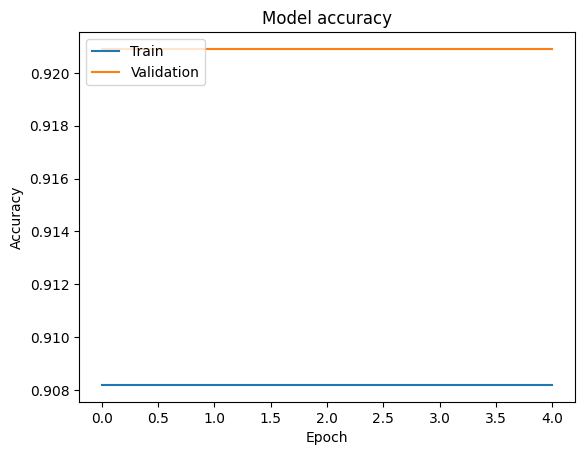

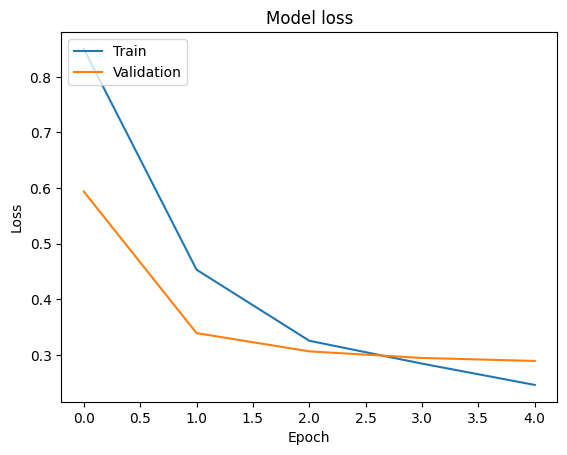

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the preprocessed dataset
df = pd.read_csv('movie_reviews.csv')

# Encode sentiment categories
le = LabelEncoder()
df['Sentiment_Label'] = le.fit_transform(df['Sentiment_Category'])

# Drop rows with missing values in the 'Processed_Review' column
df.dropna(subset=['Processed_Review'], inplace=True)

# Split the dataset into features (X) and labels (y)
X = df['Processed_Review']
y = df['Sentiment_Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train.astype(str))  # Convert to string to handle NaN values
X_train_seq = tokenizer.texts_to_sequences(X_train.astype(str))
X_test_seq = tokenizer.texts_to_sequences(X_test.astype(str))
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert labels to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(3, activation='softmax'))
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the CNN model
history = cnn_model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate CNN model
cnn_predictions = cnn_model.predict(X_test_pad)
cnn_predicted_classes = [round(pred.argmax()) for pred in cnn_predictions]
cnn_accuracy = accuracy_score(y_test, cnn_predicted_classes)
print("CNN Accuracy:", cnn_accuracy)

# Generate classification report
classification_rep = classification_report(y_test, cnn_predicted_classes)
print("Classification Report:\n", classification_rep)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


RNN Model

Epoch 1/5
12/12 [==============================] - 9s 408ms/step - loss: 0.9251 - accuracy: 0.8602 - val_loss: 0.4025 - val_accuracy: 0.9209
Epoch 2/5
12/12 [==============================] - 4s 314ms/step - loss: 0.4433 - accuracy: 0.9082 - val_loss: 0.3099 - val_accuracy: 0.9209
Epoch 3/5
12/12 [==============================] - 4s 327ms/step - loss: 0.3582 - accuracy: 0.9082 - val_loss: 0.3172 - val_accuracy: 0.9209
Epoch 4/5
12/12 [==============================] - 4s 325ms/step - loss: 0.3275 - accuracy: 0.9082 - val_loss: 0.3111 - val_accuracy: 0.9209
Epoch 5/5
7/7 [==============================] - 1s 61ms/step
RNN Accuracy: 0.9279279279279279
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00         1
           2       0.93      1.00      0.96       206

    accuracy                           0.93       222
   macro avg       0.31      0.33      0.32  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


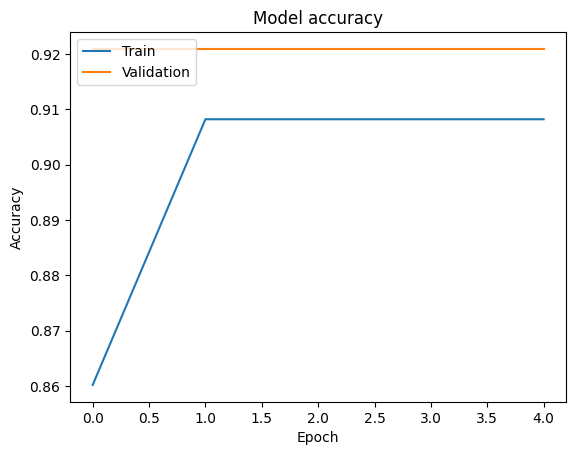

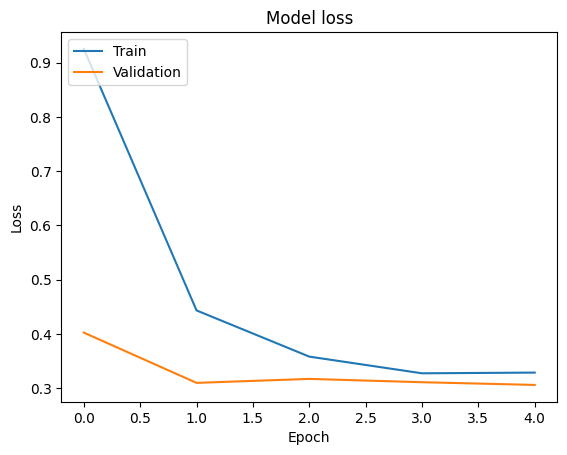

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Load the preprocessed dataset
df = pd.read_csv('movie_reviews.csv')

# Encode sentiment categories
le = LabelEncoder()
df['Sentiment_Label'] = le.fit_transform(df['Sentiment_Category'])

# Drop rows with missing values in the 'Processed_Review' column
df.dropna(subset=['Processed_Review'], inplace=True)

# Split the dataset into features (X) and labels (y)
X = df['Processed_Review']
y = df['Sentiment_Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train.astype(str))  # Convert to string to handle NaN values
X_train_seq = tokenizer.texts_to_sequences(X_train.astype(str))
X_test_seq = tokenizer.texts_to_sequences(X_test.astype(str))
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert labels to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
rnn_model.add(LSTM(100))
rnn_model.add(Dense(3, activation='softmax'))
rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the RNN model
history = rnn_model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate CNN model
rnn_predictions = rnn_model.predict(X_test_pad)
rnn_predicted_classes = [round(pred.argmax()) for pred in rnn_predictions]
rnn_accuracy = accuracy_score(y_test, rnn_predicted_classes)
print("RNN Accuracy:", rnn_accuracy)

# Generate classification report
classification_rep = classification_report(y_test, rnn_predicted_classes)
print("Classification Report:\n", classification_rep)


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Comparison

In [ ]:
import plotly.graph_objects as go

# Accuracy comparison
models = ['Logistic Regression', 'Naive Bayes']
accuracies = [lr_accuracy, nb_accuracy]

fig = go.Figure([go.Bar(x=models, y=accuracies, marker=dict(color='skyblue'))])
fig.update_layout(title='Model Accuracies', xaxis_title='Models', yaxis_title='Accuracy')
fig.show()

In [ ]:
import plotly.graph_objects as go

# Accuracy comparison
models = ['CNN', 'RNN']
accuracies = [cnn_accuracy, rnn_accuracy]

fig = go.Figure([go.Bar(x=models, y=accuracies, marker=dict(color='skyblue'))])
fig.update_layout(title='Model Accuracies', xaxis_title='Models', yaxis_title='Accuracy')
fig.show()

Feature Importance Visualization

In [ ]:
importance = lr_model.coef_[0]
features = X.columns

# Create a horizontal bar plot for feature importance
fig = go.Figure(go.Bar(
    x=importance,
    y=features,
    orientation='h'))

fig.update_layout(title='Feature Importance for Logistic Regression',
                  xaxis_title='Importance',
                  yaxis_title='Features',
                  template='plotly_dark')
fig.show()


Word Cloud for Most Frequent Words

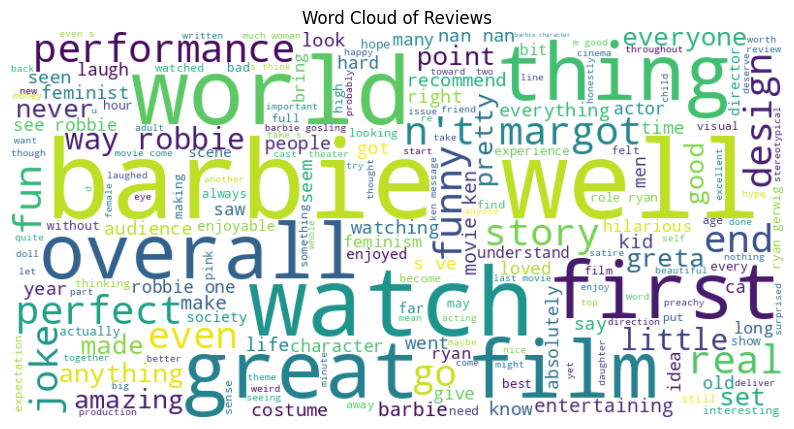

In [ ]:
from wordcloud import WordCloud

# Convert non-string values to strings in 'Processed_Review' column
df['Processed_Review'] = df['Processed_Review'].astype(str)

# Concatenate all reviews
all_reviews = ' '.join(review for review in df['Processed_Review'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


Scatter Plot of Sentiment Scores vs. Review Length

In [ ]:
import plotly.express as px
# Calculate review lengths
df['Review_Length'] = df['Processed_Review'].apply(lambda x: len(x.split()))

# Scatter plot of sentiment scores vs. review length
fig = px.scatter(df, x='Review_Length', y='Sentiment_Score', title='Sentiment Score vs. Review Length')
fig.update_layout(template='plotly_dark')
fig.show()


Insights from Data Visualization

In [ ]:
sentiment_distribution = df['Sentiment_Category'].value_counts()

# Pie chart to show sentiment distribution
fig = go.Figure(data=[go.Pie(labels=sentiment_distribution.index, values=sentiment_distribution.values)])
fig.update_layout(title='Sentiment Category Distribution',
                  template='plotly_dark')
fig.show()
